In [4]:
# Final Deliverable by Brady Mathews
# On my honor, as a student, I have neither given nor received unauthorized aid on this academic work

# Business Understanding

In [5]:
# We are trying to determine which persons who carried season passes last year will defect and which will renew their passes.
# We have data of season ticket holders from last year.
# This is significant because it can help us figure out who may not buy season passes this year.
# We can reach out to them and try and focus our marketing efforts that way.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [9]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [10]:
df = df.drop(['CHILD','SPORT'], axis=1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,0,0,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,,65,194


In [11]:
df['GAMES'] = df['Y1G1'] + df['Y1G2'] + df['Y1G3'] + df['Y1G4'] + df['Y1G5']
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL,GAMES
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,,77,203,3
1,298S54OK,1,0,0,1,0,1,15,3,1,,,0,0,1,53,68,2
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,,50,38,2
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,1,60,68,3
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,,65,194,1


In [12]:
df = df.drop(['Y1G1', 'Y1G2', 'Y1G3', 'Y1G4', 'Y1G5'], axis=1)
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,COMP,PCTMARR,HOMEVAL,GAMES
0,580V74KT,0,15,8,1,94,4,0,1,,77,203,3
1,298S54OK,1,15,3,1,,,0,0,1,53,68,2
2,268D25AO,1,15,11,1,67,2,0,1,,50,38,2
3,312Q12WV,1,15,4,0,62,4,1,1,1,60,68,3
4,420R23VB,0,15,5,0,89,4,1,1,,65,194,1


In [13]:
df = df.drop(['COMP', 'AGE', 'INCOME'], axis=1)
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,GNDR,OWNHOME,PCTMARR,HOMEVAL,GAMES
0,580V74KT,0,15,8,1,0,1,77,203,3
1,298S54OK,1,15,3,1,0,0,53,68,2
2,268D25AO,1,15,11,1,0,1,50,38,2
3,312Q12WV,1,15,4,0,1,1,60,68,3
4,420R23VB,0,15,5,0,1,1,65,194,1


# Data Visualization

In [35]:
df.groupby(['Y2defect', 'GAMES']).count()

FAKEID  Y1price  YEARS  BACKER  GNDR  OWNHOME  PCTMARR  \
Y2defect GAMES                                                           
0        1         994      994    994     994   994      994      994   
         2        1535     1535   1535    1535  1535     1535     1535   
         3        1316     1316   1316    1316  1316     1316     1316   
         4         633      633    633     633   633      633      633   
         5         130      130    130     130   130      130      130   
1        1        1561     1561   1561    1561  1561     1561     1561   
         2        1686     1686   1686    1686  1686     1686     1686   
         3         869      869    869     869   869      869      869   
         4         406      406    406     406   406      406      406   
         5          86       86     86      86    86       86       86   

                HOMEVAL  
Y2defect GAMES           
0        1          994  
         2         1535  
         3         1316  
         4          633  
         5          130  
1        1         1561  
         2         1686  
         3          869  
         4          406  
         5           86

Y2defect
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

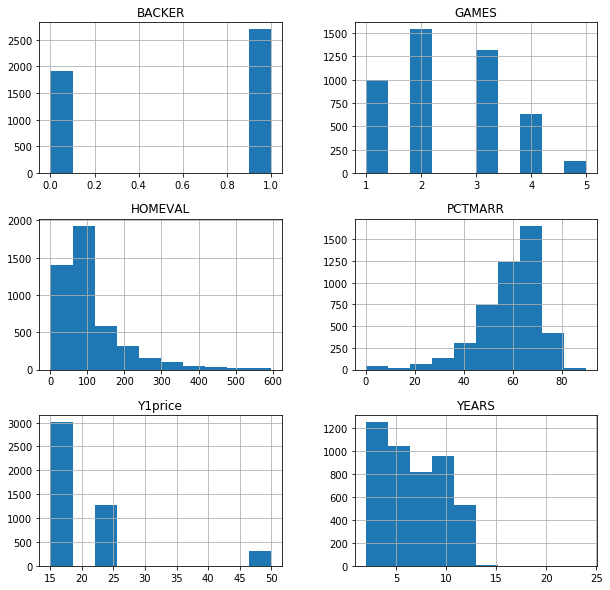

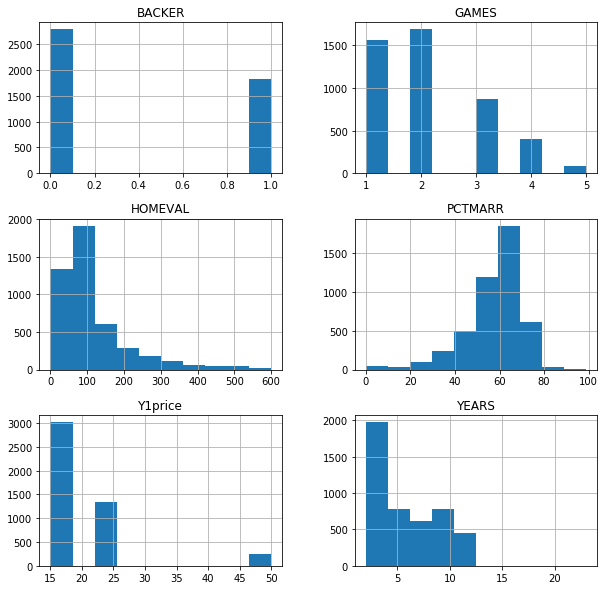

In [36]:
df.groupby('Y2defect').hist(figsize=(10,10))

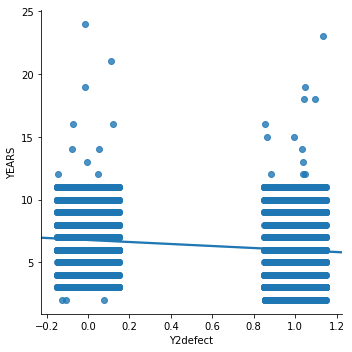

In [37]:
sns.lmplot("Y2defect", "YEARS", df, x_jitter=.15)

In [38]:
# People who defect went to less games than those who don't defect.
# Backer, games, and years seem to all be significant columns regarding defecting.
# While there is not a massive difference, generally people who defect have had season tickets for less years than others.

# Exploratory Analysis

In [42]:
import scipy.stats as stats

In [43]:
df.corr()

,Y2defect,Y1price,YEARS,BACKER,PCTMARR,HOMEVAL,GAMES
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,-0.023869,0.029722,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,0.008032,0.095580,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,0.023691,-0.049689,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,0.032558,-0.064727,0.220321
PCTMARR,-0.023869,0.008032,0.023691,0.032558,1.000000,0.046570,0.021239
HOMEVAL,0.029722,0.095580,-0.049689,-0.064727,0.046570,1.000000,-0.011751
GAMES,-0.164720,0.022259,0.217106,0.220321,0.021239,-0.011751,1.000000


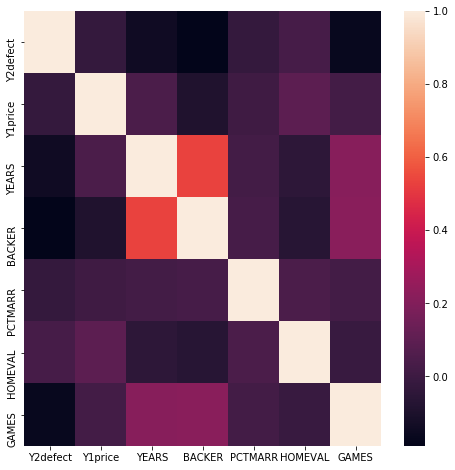

In [44]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())

In [52]:
# I want to test whether BACKER is significant regarding Y2defect

In [46]:
stats.ttest_rel(df['Y2defect'], df['BACKER'])

Ttest_relResult(statistic=1.3100247022498384, pvalue=0.19022013395533022)

In [51]:
# Interestingly enough, the T-test result indicates that BACKER is not a significant column on defect.
# This is interesting because it shows us that this data is for the most part not directly correlated with whether or not someone will defect.

# Model Development

In [15]:
# Decision Tree

In [16]:
y = df['Y2defect']
X = df[['GAMES', 'YEARS', 'BACKER']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.58842676311
[[946 417]
 [721 681]]
             precision    recall  f1-score   support

          0       0.57      0.69      0.62      1363
          1       0.62      0.49      0.54      1402

avg / total       0.59      0.59      0.58      2765

0.589895945735


In [20]:
# KNN

In [21]:
y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID', 'GNDR', 'OWNHOME'], axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier()    #  n_neighbors=5 by default
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
print metrics.accuracy_score(y_test, knn.predict(X_test))
print metrics.confusion_matrix(y_test, knn.predict(X_test))
print metrics.classification_report(y_test, knn.predict(X_test))
print metrics.roc_auc_score(y_test, knn.predict(X_test))

0.520433996383
[[745 618]
 [708 694]]
             precision    recall  f1-score   support

          0       0.51      0.55      0.53      1363
          1       0.53      0.50      0.51      1402

avg / total       0.52      0.52      0.52      2765

0.520797770296


In [24]:
# Logistic Regression

In [25]:
y = df['Y2defect']
X = df.drop(['Y2defect', 'FAKEID', 'GNDR', 'OWNHOME'], axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.591320072333
[[840 523]
 [607 795]]
             precision    recall  f1-score   support

          0       0.58      0.62      0.60      1363
          1       0.60      0.57      0.58      1402

avg / total       0.59      0.59      0.59      2765

0.591667338243


# Model Deployment

In [28]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [29]:
df2['GAMES'] = df2['Y2G1'] + df2['Y2G2'] + df2['Y2G3'] + df2['Y2G4'] + df2['Y2G5']
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,GAMES
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64,2
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128,5
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113,3
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81,2
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110,2


In [30]:
df2 = df2.drop(['Y2G1', 'Y2G2', 'Y2G3', 'Y2G4', 'Y2G5'], axis=1)
df2.head()

,FAKEID,Y3defect,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL,GAMES
0,580D24RR,NaN,15,5,0,49.0,4,NaN,0,1,0.0,,66,64,2
1,179Q96NO,NaN,25,9,1,84.0,5,,0,,0.0,,67,128,5
2,050Z45TB,NaN,15,5,1,NaN,,NaN,0,0,NaN,1,52,113,3
3,399V18KY,NaN,15,1,0,34.0,4,1,0,1,NaN,,65,81,2
4,009A52KP,NaN,25,9,1,59.0,4,NaN,1,1,0.0,,65,110,2


In [31]:
validation = df2[['GAMES', 'YEARS', 'BACKER']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 3 columns):
GAMES     9542 non-null int64
YEARS     9542 non-null int64
BACKER    9542 non-null int64
dtypes: int64(3)
memory usage: 223.7 KB


In [32]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [33]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry2.csv", index=False)

# Storytelling

In [49]:
# Backer, games, and years were the most significant columns regarding whether or not someone would defect.
# My suggestion would be to promote the Backer club more, and get ticket holders as involved as possible.
# Also try to increase attendance for each individual games throughout the season, so ticket holders feel as though they are truly getting what they paid for.